Bibli a importer

In [44]:
import numpy as np 
import pandas as pd
import seaborn as sns
import pylab
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import datasets 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

Import dataframe and analyse 

In [20]:
datan = pd.read_csv("vib_flight_phases.csv")
data = pd.DataFrame(datan)
data

,air-blast,stabilization,landing
0,-4.3610,5.871623,-11.7190
1,1.3172,0.072109,-16.1800
2,5.6777,0.514440,-15.0530
3,7.8207,-11.094953,-9.6556
4,8.7700,-6.434641,-2.8009
...,...,...,...
9995,3.0466,8.910209,4.1882
9996,10.5050,4.565551,8.6056
9997,13.2660,-4.659858,13.7860
9998,9.9696,10.328305,13.7430


In [21]:
data.describe()

,air-blast,stabilization,landing
count,10000.000000,10000.000000,10000.000000
mean,0.010455,-0.012102,0.007295
std,7.553019,7.832228,7.825599
min,-27.948000,-28.937415,-27.762000
25%,-4.858950,-5.260075,-5.361100
50%,-0.145710,-0.077647,-0.140750
75%,5.042825,5.229777,5.354975
max,29.184000,34.189000,25.828000


Plot des bails

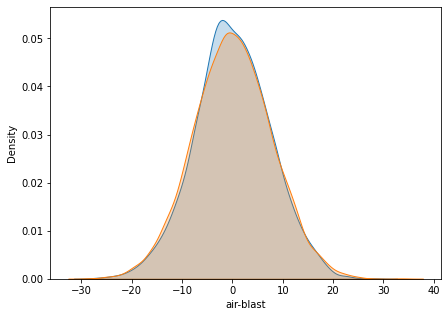

In [22]:
plt.figure(figsize=(7,5)) 
sns.kdeplot(data['air-blast'],shade=True) 
sns.kdeplot(data['stabilization'],shade=True) 
plt.show()

Diag a moust

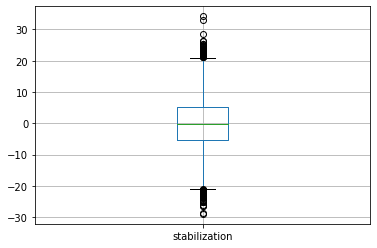

In [23]:
df=pd.DataFrame(data, columns=["air-blast","stabilization"])
boxplot = df.boxplot(column="stabilization")

Courbe de ref

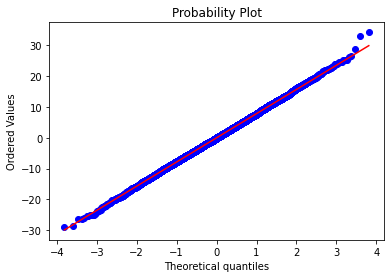

In [24]:
qq_plot_acc_x = stats.probplot(data['stabilization'], dist='norm',plot=pylab)

test normalite, OK si p>0.5

In [26]:
normality1 = stats.shapiro(data.loc['0':'4999','stabilization'])
normality2 = stats.shapiro(data.loc['5000':'9999','stabilization'])
print(normality1, normality2)

ShapiroResult(statistic=0.9996285438537598, pvalue=0.4933258295059204) ShapiroResult(statistic=0.9997165203094482, pvalue=0.755645215511322)


test homogeneite OK si p>0.5

In [27]:
homogeneity = stats.levene(data.loc['0':'4999','air-blast'], data.loc['5000':'9999','stabilization']) 
homogeneity

LeveneResult(statistic=28.13385218982659, pvalue=1.1562701052064659e-07)

suppose normal et homogène, et indep, donc ttest si p>0.5 alors indep

In [28]:
#T-Test Indépendant
stats.ttest_ind(data.loc['0':'4999','air-blast'],data.loc['5000':'9999','stabilization'])

Ttest_indResult(statistic=0.7802305978333521, pvalue=0.4352736258019335)

correlation stat

In [29]:
Corr=data.corr()
Corr

,air-blast,stabilization,landing
air-blast,1.000000,0.009585,-0.000610
stabilization,0.009585,1.000000,0.000187
landing,-0.000610,0.000187,1.000000


norm les données

In [30]:
# normalisation des données
normalisation = pd.DataFrame(StandardScaler().fit_transform(data), columns = data.columns, index = data.index)

analyse compo principales

In [31]:
# on applique l'Analyse en Composantes Principales sur les données
pca = PCA()
composantes_principales = pca.fit_transform(normalisation)
composantes_principales

array([[-0.16781911,  1.43634486,  1.02651462],
       [-0.19458464,  2.06670978,  0.00646985],
       [-0.63838949,  1.93057684, -0.37005048],
       ...,
       [-0.76754421, -1.68533653, -1.76166881],
       [-1.81028304, -1.80978592, -0.10330673],
       [-0.75868336, -0.90491097, -0.33497595]])

regression lineaire X col Y line
regresser Y sur X

In [52]:
data_file = "CO2_emissions.csv"
datan = pd.read_csv(data_file, index_col=['Car','Model'])
data = pd.DataFrame(datan)

Y=np.array(data["CO2"])
X=np.array(data["Weight"]).reshape((-1,1))

model=LinearRegression()
RL=model.fit(X,Y)

Trouver ordonné a lorigine et pente

In [53]:
print("ord a lorigine ",RL.coef_,"pente ",RL.intercept_)

ord a lorigine  [0.01699973] pente  134.12441312138762


In [54]:
RL.score(X,Y) #score

0.30486966019513095

In [62]:
X=pd.DataFrame(data,columns=['Weight','Volume','velocity','power'])
modelMulti=LinearRegression()
MRL=modelMulti.fit(X,Y)
print("ord a lorigine ",MRL.coef_,"pente ",MRL.intercept_, "score ",MRL.score(X,Y))

ord a lorigine  [0.00737506 0.00796549 0.04236426 0.00233445] pente  123.0041893402329 score  0.40316108114798055
